In [34]:
from sklearn.model_selection import GroupKFold, cross_val_score, KFold
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import os, glob, re, json
from os.path import join
import numpy as np
import pandas as pd
from nilearn import image, masking, maskers, plotting, datasets

from nilearn.image import resample_to_img, math_img, new_img_like
from datetime import datetime
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import h5py
from nilearn.input_data import NiftiLabelsMasker, NiftiMapsMasker

import nibabel as nib

import neuromaps
from neuromaps import datasets

from neuromaps.datasets import fetch_annotation, fetch_fslr
from netneurotools import datasets as nntdata
from neuromaps.parcellate import Parcellater
from neuromaps.images import dlabel_to_gifti

from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob


# Multiclass clssification using sklearn
1. Classify pain, vicarious, cognitive maps based on single trials 
2. Classify pain, vicarious, cogntiive maps based on contrast maps

In [46]:
import gc
gc.collect()
del target_img

In [ ]:
# 1. apply 

# 1. apply prob atlas to single trial

In [30]:
atlas_filename = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_scaffold.nii.gz'
atlas_img = image.load_img(atlas_filename)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

# Load the CSV file containing labels
labels_csv = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_labels.csv'
labels_df = pd.read_csv(labels_csv)

In [7]:
atlas_img.get_fdata().shape

(193, 229, 193, 542)

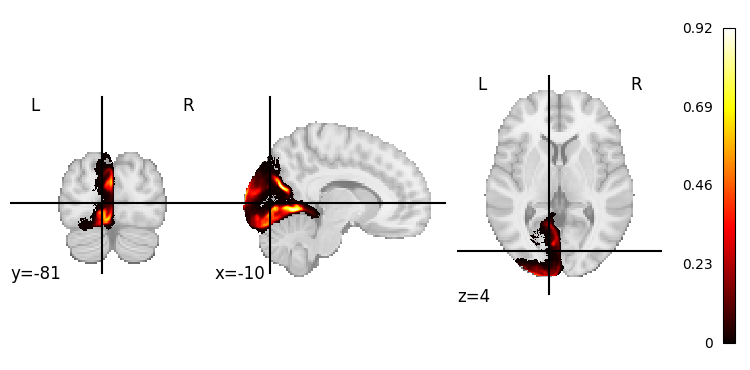

In [10]:
atlas3 = image.index_img(atlas_img, 3)
plotting.plot_stat_map(atlas3)

# Juelich atlas

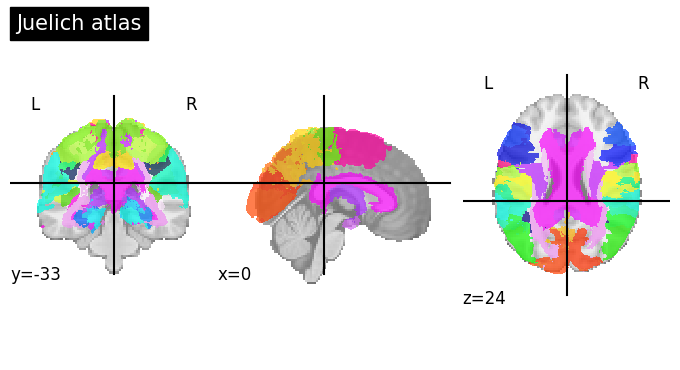

In [11]:
from nilearn import datasets
dataset_ju = datasets.fetch_atlas_juelich("maxprob-thr0-1mm")
atlas_ju_filename = dataset_ju.filename
plotting.plot_roi(atlas_ju_filename, title="Juelich atlas")

masker = NiftiLabelsMasker(labels_img=atlas_ju_filename, standardize=True)



In [25]:
image.load_img(atlas_ju_filename).get_data().unique()

ExpiredDeprecationError: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Raises <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0

In [12]:
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupdown/'
sub = "sub-0101"

flist = glob.glob(join(singletrial_dir, sub, f"{sub}_ses-*_run-*_runtype-pain_event-stimulus_trial-*_cuetype-*_stimintensity-*.nii.gz"))


In [35]:
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupdown/'
sub = "sub-0101"

flist = glob.glob(join(singletrial_dir, sub, f"{sub}_ses-*_run-*_runtype-pain_event-stimulus_trial-*_cuetype-*_stimintensity-*.nii.gz"))
# load all the images -> average -> transform to fslr
# all_imgs = image.concat_imgs(flist)
# mean_img = image.mean_img(all_imgs)
# sub101 = neuromaps.transforms.mni152_to_fslr(mean_img, fslr_density='32k', method='linear')
# mean_img is now a NIfTI-like image containing the average of all input images
# parcellate per single trial
schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
parcelarray = []
for fname in flist:
    singletrialFSLR = neuromaps.transforms.mni152_to_fslr(fname, fslr_density='32k', method='linear')
    parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
    singletrial_parc = parc.fit_transform(singletrialFSLR, 'fsLR')
    parcelarray.append(singletrial_parc)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_1464/2944819099.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


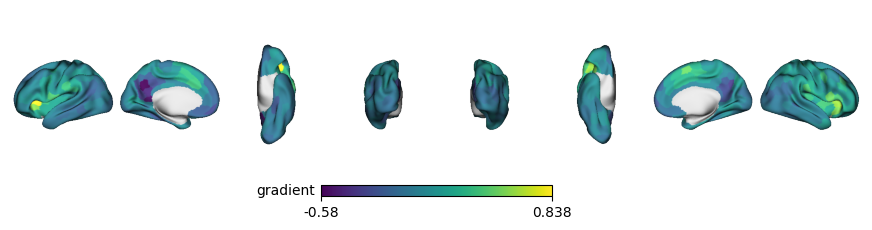

In [36]:
average_parcel = np.vstack(parcelarray).mean(axis=0)


# fcgradient = fetch_annotation(source='margulies2016', desc='fcgradient02', space='fsLR', den='32k')
schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
# sub101_parc = parc.fit_transform(sub101, 'fsLR')
sub101_img = parc.inverse_transform(average_parcel)

surfaces_fslr = fetch_fslr()
lh_fslr, rh_fslr = surfaces_fslr['inflated']

# color_range = (0,.15)
p = Plot(surf_lh=lh_fslr,
            surf_rh=rh_fslr, 
            size=(1000, 200), 
            zoom=1.2, layout='row', 
            views=['lateral', 'medial', 'ventral', 'posterior'], 
            mirror_views=True, brightness=.7)
p.add_layer({'left': sub101_img[0], 
            'right': sub101_img[1]}, 
            cmap='viridis', cbar=True,
            # color_range=color_range,
            cbar_label='gradient'
            ) # YlOrRd_r
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
fig = p.build(cbar_kws=cbar_kws)
fig.show()

# pipeline for multiclass
* load single trials
* Parcellate 
* save data into array with metadaa
* apply crossvalidation on data

In [42]:
singletrial_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupdown/'
# sub = "sub-0101"
subdirectories = glob.glob(join(singletrial_dir, "sub-*"))
flists = []
for subdir in subdirectories:
    sub = os.path.basename(subdir)
    flist = glob.glob(join(singletrial_dir, sub, f"{sub}_ses-*_run-*_runtype-*_event-stimulus_trial-*_cuetype-*_stimintensity-*.nii.gz"))
    flists.append(flist)




In [44]:
len(flists)

112

In [48]:
flattened_list = [item for sublist in flists for item in sublist]


In [50]:
flattened_list[0]

'/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupdown/sub-0117/sub-0117_ses-01_run-02_runtype-cognitive_event-stimulus_trial-006_cuetype-low_stimintensity-med.nii.gz'

In [51]:
# load all the images -> average -> transform to fslr
# all_imgs = image.concat_imgs(flist)
# mean_img = image.mean_img(all_imgs)
# sub101 = neuromaps.transforms.mni152_to_fslr(mean_img, fslr_density='32k', method='linear')
# mean_img is now a NIfTI-like image containing the average of all input images
# parcellate per single trial

schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
parcelarray = []
metadata = []
for fname in flattened_list:
    metadata.append(os.path.basename(fname))
    singletrialFSLR = neuromaps.transforms.mni152_to_fslr(fname, fslr_density='32k', method='linear')
    parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
    singletrial_parc = parc.fit_transform(singletrialFSLR, 'fsLR')
    parcelarray.append(singletrial_parc)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-

In [52]:
len(parcelarray)

20029

In [54]:
parcel_value = np.vstack(parcelarray)

In [56]:
parcel_value.shape

(20029, 400)

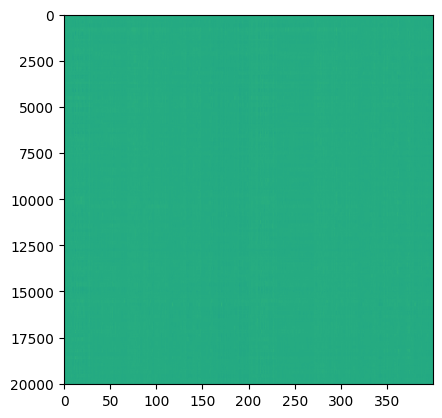

In [61]:
plt.imshow(parcel_value, aspect=.02, cmap='viridis')

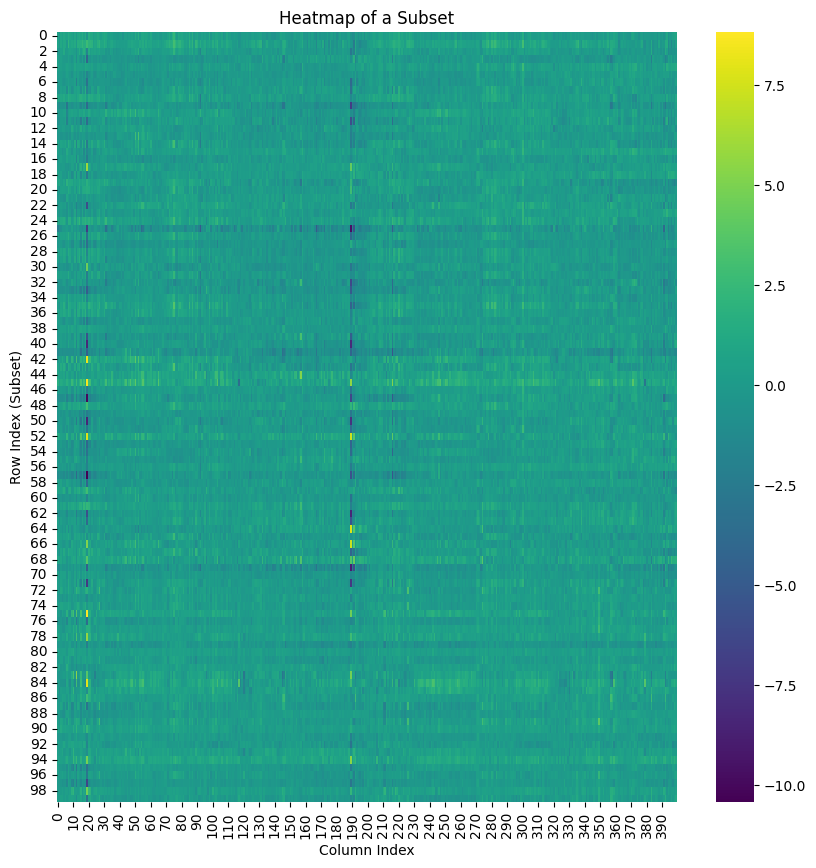

In [63]:
import seaborn as sns

# Selecting a subset (e.g., first 100 rows)
subset = parcel_value[:100, :]

plt.figure(figsize=(10, 10))
sns.heatmap(subset, cmap='viridis', cbar=True)
plt.title('Heatmap of a Subset')
plt.xlabel('Column Index')
plt.ylabel('Row Index (Subset)')
plt.show()


In [77]:
np.save('/Volumes/seagate/cue_singletrials/singletrial-pvc_atlas-schaefer2018.npy',parcel_value)

data = {
    "code_generated": "scripts/step12_multiclass/multiclass_parcels.ipynb",
    "code_parcellate": """schaefer = nntdata.fetch_schaefer2018('fslr32k')['400Parcels7Networks']
                        parcelarray = []
                        metadata = []
                        for fname in flattened_list:
                            metadata.append(os.path.basename(fname))
                            singletrialFSLR = neuromaps.transforms.mni152_to_fslr(fname, fslr_density='32k', method='linear')
                            parc = Parcellater(dlabel_to_gifti(schaefer), 'fsLR')
                            singletrial_parc = parc.fit_transform(singletrialFSLR, 'fsLR')
                            parcelarray.append(singletrial_parc)""",
    "atlas": "Schaefer2018_400Parcels_7Networks_order",
    "python_packages": ["neuromaps", "netneurotools"]
}
with open('/Volumes/seagate/cue_singletrials/singletrial-pvc_atlas-schaefer2018.json', 'w') as json_file:
    json.dump(data, json_file, indent=4)

In [67]:
metadata

['sub-0117_ses-01_run-02_runtype-cognitive_event-stimulus_trial-006_cuetype-low_stimintensity-med.nii.gz',
 'sub-0117_ses-01_run-05_runtype-cognitive_event-stimulus_trial-010_cuetype-high_stimintensity-med.nii.gz',
 'sub-0117_ses-01_run-05_runtype-cognitive_event-stimulus_trial-001_cuetype-high_stimintensity-low.nii.gz',
 'sub-0117_ses-01_run-06_runtype-vicarious_event-stimulus_trial-004_cuetype-low_stimintensity-low.nii.gz',
 'sub-0117_ses-01_run-01_runtype-vicarious_event-stimulus_trial-004_cuetype-high_stimintensity-high.nii.gz',
 'sub-0117_ses-01_run-01_runtype-vicarious_event-stimulus_trial-000_cuetype-low_stimintensity-med.nii.gz',
 'sub-0117_ses-01_run-06_runtype-vicarious_event-stimulus_trial-002_cuetype-high_stimintensity-low.nii.gz',
 'sub-0117_ses-01_run-05_runtype-cognitive_event-stimulus_trial-003_cuetype-high_stimintensity-med.nii.gz',
 'sub-0117_ses-01_run-02_runtype-cognitive_event-stimulus_trial-004_cuetype-low_stimintensity-low.nii.gz',
 'sub-0117_ses-01_run-03_runtyp

In [73]:
metadatadf = pd.DataFrame(metadata, columns=['filename'])

df_split = metadatadf['filename'].str.extract(
    r'(?P<sub>sub-\d+)_ses-(?P<ses>\d+)_run-(?P<run>\d+)_runtype-(?P<runtype>\w+)_event-(?P<event>\w+)_trial-(?P<trial>\d+)_cuetype-(?P<cuetype>\w+)_stimintensity-(?P<stimintensity>\w+)'
)

df_final = pd.concat([metadatadf, df_split], axis=1)
df_final.head()

,filename,sub,ses,run,runtype,event,trial,cuetype,stimintensity
0,sub-0117_ses-01_run-02_runtype-cognitive_event...,sub-0117,01,02,cognitive,stimulus,006,low,med
1,sub-0117_ses-01_run-05_runtype-cognitive_event...,sub-0117,01,05,cognitive,stimulus,010,high,med
2,sub-0117_ses-01_run-05_runtype-cognitive_event...,sub-0117,01,05,cognitive,stimulus,001,high,low
3,sub-0117_ses-01_run-06_runtype-vicarious_event...,sub-0117,01,06,vicarious,stimulus,004,low,low
4,sub-0117_ses-01_run-01_runtype-vicarious_event...,sub-0117,01,01,vicarious,stimulus,004,high,high


In [76]:
# Ydummy = df_final[
#     ["dummy_pain", "dummy_vicarious", "dummy_cognitive"] #, "dummy_general"]
# ] 
Yinterim, uniques = pd.factorize(df_final['runtype'])
Xinterim = parcel_value  

# create groups (per subject)
codes, _ = pd.factorize(df_final['sub'])
df_final['groupsinterim'] = codes + 1

# Plotting
plt.figure(figsize=(4,3))
sns.heatmap(Yinterim, cmap="viridis", cbar=True)
plt.title("Y interim (Sampled)")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()


IndexError: Inconsistent shape between the condition and the input (got (20029, 1) and (20029,))

<Figure size 400x300 with 0 Axes>

In [80]:
uniques

Index(['cognitive', 'vicarious', 'pain'], dtype='object')

In [78]:
groups = df_final['groupsinterim']
Yinterim, uniques = pd.factorize(df_final['runtype'])
X = Xinterim
Y = Yinterim

In [81]:
min_class_size = np.bincount(Y).min()

In [87]:
    min_class_size = min(np.bincount(Y_group).min(), group_indices.size)

In [90]:
unique_groups

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112])

# balancer
some participants don't have equal number of trials
we balance it here

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.utils import resample

# Given variables: X (data array), Y (factorized labels), groups (array of group labels)

# Convert groups to an array if it's not already
groups_array = np.array(groups)

# Find unique groups
unique_groups = np.unique(groups_array)

# Initialize lists to hold the balanced dataset
X_balanced = []
Y_balanced = []
groups_balanced = []

for group in unique_groups:
    # print(group)
    # Indices for the current group
    group_indices = np.where(groups_array == group)[0]
    print(group)
    # Extract current group's data and labels
    X_group = X[group_indices]
    Y_group = Y[group_indices]
    
    # Get the smallest class size within this group
    min_class_size = min(np.bincount(Y_group).min(), group_indices.size)
    if min_class_size > 0:
        # Initialize temporary lists for the group's balanced data
        X_group_balanced = []
        Y_group_balanced = []
        
        # Balance each class within the group
        for class_label in np.unique(Y_group):
            print(class_label)
            # Indices for the current class within the group
            class_indices = np.where(Y_group == class_label)[0]
            
            # Resample the class to the target size
            resampled_indices = resample(class_indices, n_samples=min_class_size, replace=False, random_state=42)
            
            # Append resampled data and labels to the group's temporary lists
            X_group_balanced.append(X_group[resampled_indices])
            Y_group_balanced.append(Y_group[resampled_indices])
        
        # Concatenate balanced data for the current group and append to the overall balanced lists
        X_balanced.append(np.vstack(X_group_balanced))
        Y_balanced.append(np.concatenate(Y_group_balanced))
        groups_balanced += [group] * min_class_size * len(np.unique(Y_group))
    else:
        print("f{group} does not have trials in one of the classes")

# Concatenate all balanced data from each group to form the final balanced dataset
X_balanced = np.vstack(X_balanced)
Y_balanced = np.concatenate(Y_balanced)
groups_balanced = np.array(groups_balanced)

# Now, X_balanced, Y_balanced, and groups_balanced contain your balanced dataset respecting the original group structure


1
0
1
2
2
0
1
2
3
0
1
2
4
0
1
2
5
0
1
2
6
0
1
2
7
0
1
2
8
0
1
2
9
0
1
2
10
0
1
2
11
0
1
2
12
0
1
2
13
0
1
2
14
0
1
2
15
0
1
2
16
0
1
2
17
0
1
2
18
0
1
2
19
0
1
2
20
0
1
2
21
0
1
2
22
0
1
2
23
0
1
2
24
0
1
2
25
0
1
2
26
0
1
2
27
0
1
2
28
0
1
2
29
0
1
2
30
0
1
2
31
0
1
2
32
0
1
2
33
0
1
2
34
0
1
2
35
0
1
2
36
0
1
2
37
0
1
2
38
0
1
2
39
0
1
2
40
0
1
2
41
0
1
42
0
1
2
43
0
1
2
44
0
1
45
0
1
2
46
0
1
2
47
0
1
2
48
0
1
2
49
0
1
2
50
0
1
2
51
0
1
2
52
0
1
2
53
0
1
2
54
0
1
2
55
0
1
2
56
0
1
2
57
0
1
2
58
0
1
2
59
0
1
2
60
0
1
2
61
0
1
2
62
0
1
2
63
0
1
2
64
0
1
2
65
0
1
2
66
0
1
2
67
0
1
2
68
0
1
2
69
0
1
2
70
0
1
2
71
0
1
2
72
0
1
2
73
0
1
2
74
0
1
2
75
0
1
2
76
0
1
2
77
0
1
2
78
0
1
2
79
0
1
2
80
0
1
2
81
0
1
2
82
0
1
2
83
0
1
2
84
0
1
2
85
0
1
2
86
0
1
2
87
0
1
2
88
0
1
2
89
f{group} does not have trials in one of the classes
90
0
1
2
91
0
1
2
92
0
1
2
93
0
1
2
94
0
1
2
95
0
1
2
96
0
1
2
97
0
1
2
98
0
1
2
99
0
1
2
100
0
1
2
101
0
1
2
102
0
1
2
103
0
1
2
104
0
1
2
105
0
1
2
106
0
1
2
107
0


In [97]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# This code essentially performs 10-fold cross-validation with a Support Vector Machine classifier to evaluate the model's performance on the given brain data and labels, ensuring that the cross-validation process is stratified and group-wise. The mean accuracy provides an estimate of how well the SVM model generalizes to unseen data.
# # X: brain data. shape: (number of trials, number of voxels)
# # Y: 1D array with labels (0 for pain, 1 for vicarious, 2 for cognitive)

# 10-fold stratified cross validation
# folds are applied on subject level data
# A linear SVM classifer is trained on the training data and applied on the test data, by predicting the labels on the test data.
# accuracies compiles the model accuracy of predicting the labels across the 10 folds. 


# Initialize arrays to store results
accuracies = []

# Loop through each fold

import time
start_time = time.perf_counter()
outer_cv = GroupKFold(n_splits=10)
# pls_model = PLSRegression(n_components=3)
i = 0
scores = []
weights_per_fold = []
coefficients = []
yloadings = []
y_pred_probas = []
y_tests = []
for i, (train_idx, test_idx) in enumerate(outer_cv.split(X_balanced, Y_balanced, groups_balanced)):
    X_train, X_test = X_balanced[train_idx], X_balanced[test_idx]
    Y_train, Y_test = Y_balanced[train_idx], Y_balanced[test_idx]
    
    # Initialize and train a Support Vector Machine (SVM) classifier
    svm = SVC(kernel='linear', decision_function_shape='ovr')  # One-vs-Rest
    svm.fit(X_train, Y_train)
    
    # Predict using the trained model
    Y_pred = svm.predict(X_test)
    # Y_pred_proba = svm.predict_proba(X_test)
    # y_pred_probas.append(Y_pred_proba)
    # Calculate accuracy for this fold
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    weights = svm.coef_
    weights_per_fold.append(weights)
    y_tests.append(Y_test)
# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)

# Display the mean accuracy
print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
end_time = time.perf_counter()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


Mean Accuracy: 93.07%
Elapsed time: 249.63833092999994 seconds


In [128]:
accuracies

[0.9460470085470085,
 0.9230769230769231,
 0.9385683760683761,
 0.9074074074074074,
 0.9242919389978214,
 0.9492521367521367,
 0.9185544768069039,
 0.9444444444444444,
 0.900974025974026,
 0.954248366013072]

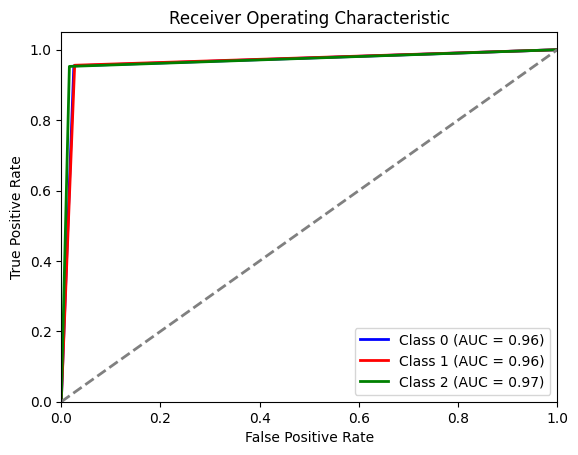

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming Y_test and Y_pred are the true labels and predicted labels
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 3
# Calculate ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test == i, Y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green']  # Adjust colors as needed
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


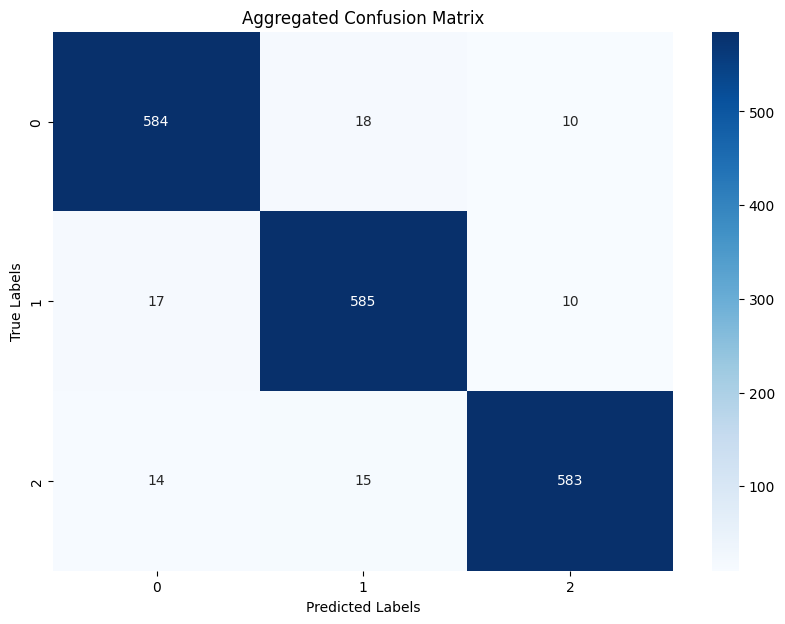

In [99]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Aggregated Confusion Matrix')
plt.show()


In [100]:
uniques

Index(['cognitive', 'vicarious', 'pain'], dtype='object')

In [116]:
cog = parc.inverse_transform(weights_per_fold[0][0])
vic = parc.inverse_transform(weights_per_fold[0][1])
pain = parc.inverse_transform(weights_per_fold[0][2])

In [135]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(1000, 200), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [125]:
# hm_viridis_onesided = LinearSegmentedColormap.from_list('homemade_viridis_one_side', (
#     # Edit this gradient at https://eltos.github.io/gradient/#homemade_viridis_one_side=E62D4F-3648A6-42A7CB-4D9421-E0DB1E
#     (0.000, (0.902, 0.176, 0.310)),
#     (0.250, (0.212, 0.282, 0.651)),
#     (0.500, (0.259, 0.655, 0.796)),
#     (0.750, (0.302, 0.580, 0.129)),
#     (1.000, (0.878, 0.859, 0.118))))

(<nibabel.gifti.gifti.GiftiImage at 0x1657c3e50>,
 <nibabel.gifti.gifti.GiftiImage at 0x16574c790>)

/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_1464/639931005.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_1464/639931005.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/bv/b3r94k7n0bq727c1_2xtykpw0000gp/T/ipykernel_1464/639931005.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


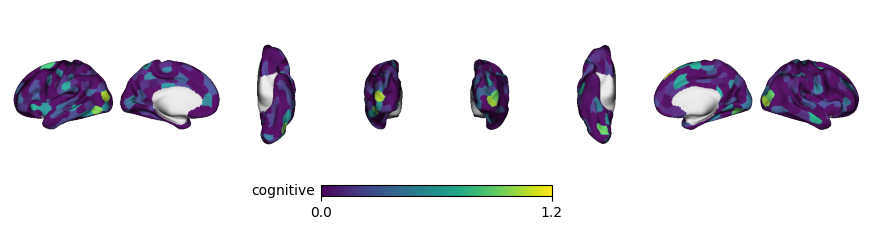

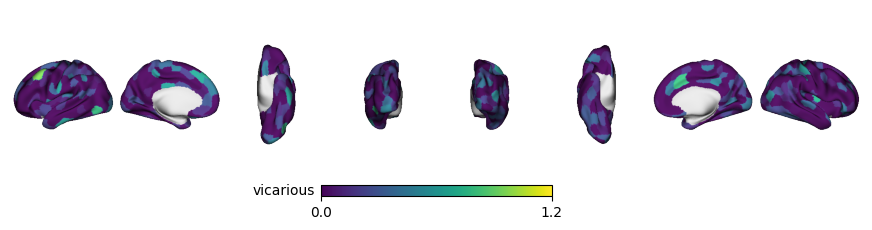

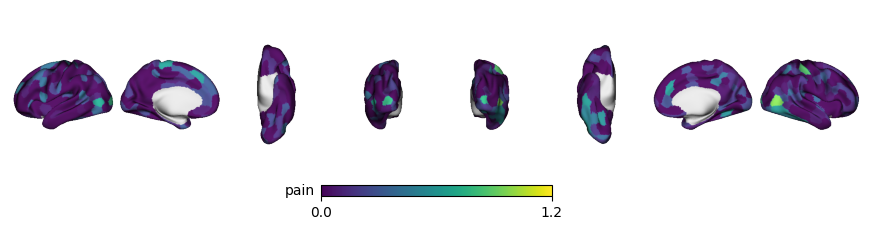

In [142]:
plot_brain_surfaces(image=cog, cbar_label='cognitive', cmap='viridis', color_range=(0,1.2))
plot_brain_surfaces(image=vic, cbar_label='vicarious', cmap='viridis', color_range=(0,1.2))
plot_brain_surfaces(image=pain, cbar_label='pain', cmap='viridis', color_range=(0,1.2))